# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [9]:
import pandas as pd
import matplotlib.pyplot as pyplot
%matplotlib inline
df = pd.read_csv('data/human_body_temperature.csv')

In [7]:
df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


(array([  4.,   6.,  15.,  26.,  30.,  30.,  15.,   1.,   2.,   1.]),
 array([  96.3 ,   96.75,   97.2 ,   97.65,   98.1 ,   98.55,   99.  ,
          99.45,   99.9 ,  100.35,  100.8 ]),
 <a list of 10 Patch objects>)

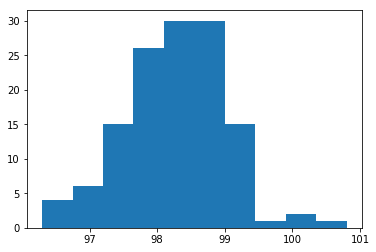

In [11]:
pyplot.hist(df.temperature)

1.  The sample is approximately normally distributed, however there is a small amount of leftward skew
2.  The sample size is

In [12]:
n=len(df.temperature)
n

130

this is considered a larger sample size (>30) in CLT-terms.  As different individuals were measured, the observations should be independent.

3.  To test whether the population mean is 98.6, we would use a one-sample t-test.  While the sample size is large in CLT terms and the normal distribution is close to the t-distrubution with this number of degrees of freedom, since the population standard deviation is unknown you are technically supposed to use the t-test (and it's just as easy anyway).

H0- population mean temperature is 98.6
HA- population mean temp is not 98.6
two tailed test at 95% confidence (alpha/2=.025)
The test statistic is:

In [13]:
t = (df.temperature.mean()-98.6)/(df.temperature.std()/n**0.5)
t

-5.454823292364079

The critical value for the left tail of the t-distribution with 129 degrees of freedom for alpha/2=0.025 is -1.97.  Our t statistic is far larger, so we can reject the null hypothesis that the population mean is 98.6.  (n.b. this agrees with recent research suggesting normal temperature is something closer to 98.2)

Were we to conduct this test using the normal distribution, critical z would be -1.96 and we would still reject the null hypothesis.  Due to the large sample size, there is little difference in our choice of tests.

4.  The margin of error and 95% confidence interval for the mean is

In [17]:
margin = 1.97*(df.temperature.std()/n**0.5)
lower = df.temperature.mean()-margin
upper = df.temperature.mean()+margin
print("margin of error: " + str(margin))
print("confidence interval: "+ str(lower)+ " to " + str(upper))

margin of error: 0.12667970117064528
confidence interval: 98.12255106806013 to 98.37591047040142


This suggests that the population mean, at 95% confidence, is between 98.12255106806013 and 98.37591047040142.  However this is estimation of a parameter, not a population percentage, and there is non-sampling related variance to human's body temperature.  We can say from this a sample mean temperature (not an individual) is "abnormal" if it is outside this confidence interval.

5.  The sample notes where a body temperature is from a male or female subject.  The means, std deviations and sizes of those subsamples are:

In [20]:
m_mean = df[df.gender=='M'].temperature.mean()
f_mean = df[df.gender=='F'].temperature.mean()
m_std = df[df.gender=='M'].temperature.std()
f_std = df[df.gender=='F'].temperature.std()
m_n = len(df[df.gender=='M'])
f_n = len(df[df.gender=='F'])

print("means-- M: " + str(m_mean)+ ", F: "+str(f_mean))
print("stddev-- M: " + str(m_std)+ ", F: "+str(f_std))
print("n-- M: "+ str(m_n)+ ", F: "+ str(f_n))

means-- M: 98.1046153846154, F: 98.39384615384613
stddev-- M: 0.6987557623265908, F: 0.7434877527313665
n-- M: 65, F: 65


To perform the required two sample t-test to test the difference between sample means, we need another parameter here, which is the pooled standard deviation

In [21]:
poolstd = (((m_n-1)*m_std**2 + (f_n-1)*f_std**2)/(m_n+f_n-2))**0.5
poolstd

0.7214685210895041

H0: m_mean == f_mean
HA: m_mean != f_mean
two tailed test 95% confidence
the test statistic is:

In [22]:
t_mf = (m_mean-f_mean)/(poolstd*(1/m_n + 1/f_n)**0.5)
t_mf

-2.285434538165274

The critical t-value for the left tail at 95% confidence with 128 degrees of freedom is still -1.97 even though we lost one degree of freedom.  The test statistic is in the left tail below the critical value and we can reject the null hypothesis.

Based on these calculations, the "traditional" 98.6 mean temperature for the human body is higher than the real mean, and men on average have a lower body temperature than women.